In [25]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import json
import os
from pprint import pprint
from sklearn.svm import SVR
from sklearn.metrics import *
from sklearn.cluster import *
from sklearn.model_selection import GridSearchCV

In [26]:
img = cv2.imread('regression/1a15ae96-38b7-4612-b0cd-91c0859a81b1.jpg')
#img = cv2.resize(img,None,fx=0.3, fy=0.3, interpolation = cv2.INTER_AREA)
# Initiate STAR detector
orb = cv2.ORB_create()
star = cv2.xfeatures2d.StarDetector_create()
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
surf = cv2.xfeatures2d.SURF_create()


In [27]:
 #compute the descriptors with ORB
kp, des = surf.detectAndCompute(img, None)

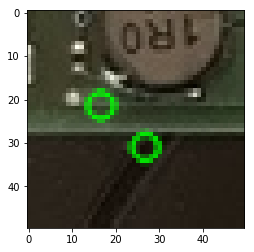

(<matplotlib.image.AxesImage at 0x7fae8d9e8160>, None)

In [28]:


# draw only keypoints location,not size and orientation
outImg = 0;
img2 = cv2.drawKeypoints(img,kp,color=(0,255,0),outImage=outImg, flags=0)
plt.imshow(img2),plt.show()

<BOWKMeansTrainer 0x7fae8d34c030>


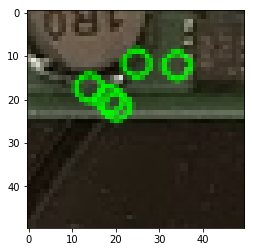

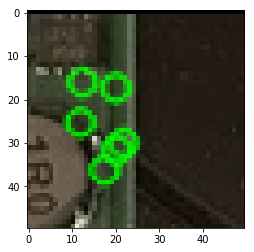

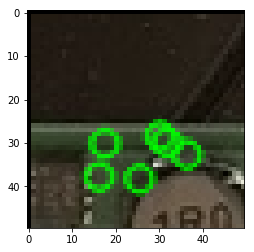

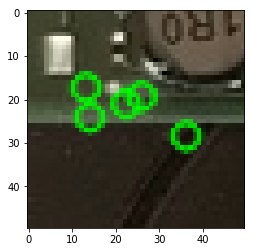

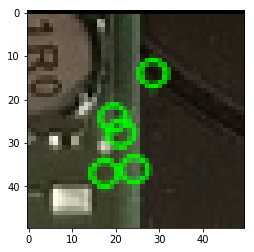

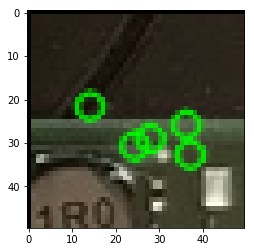

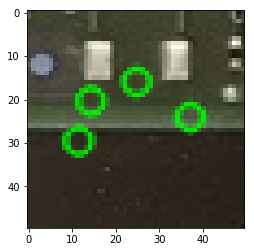

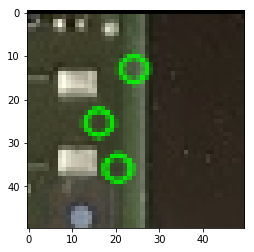

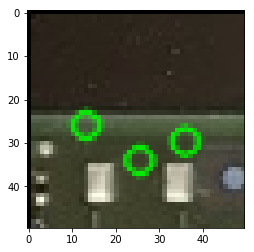

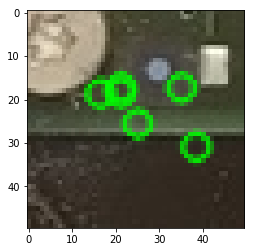

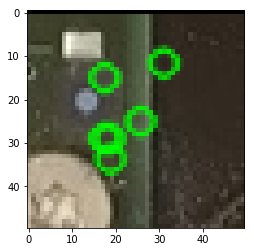

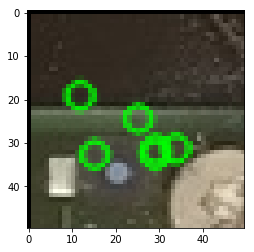

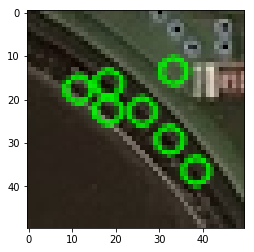

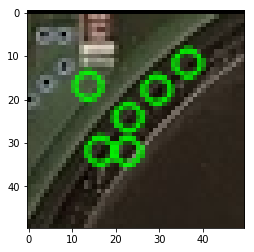

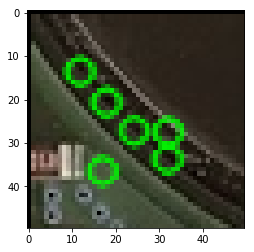

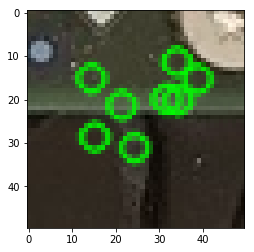

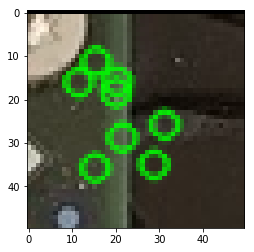

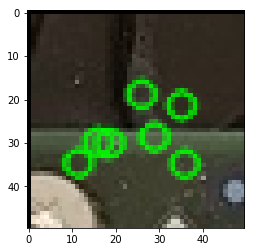

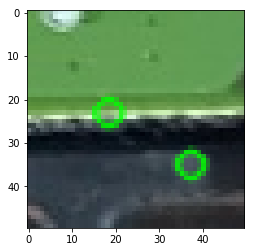

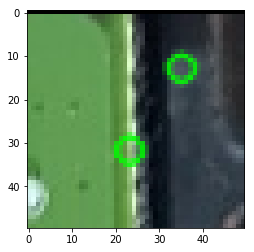

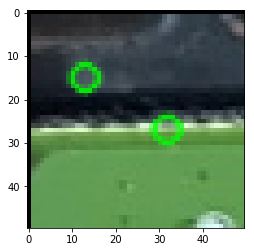

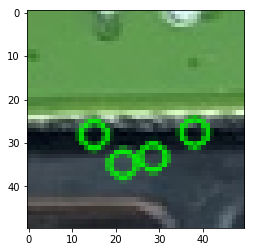

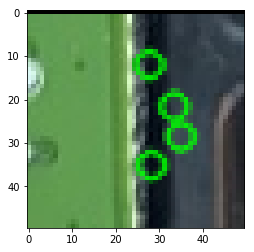

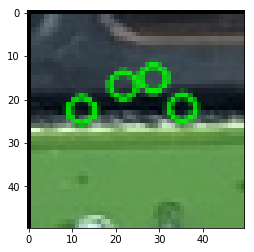

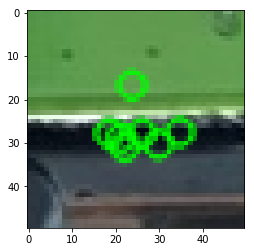

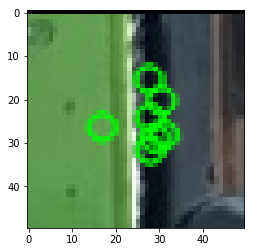

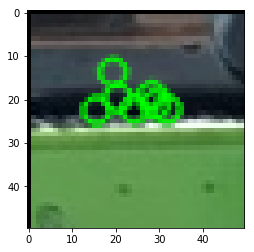

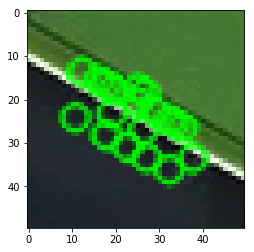

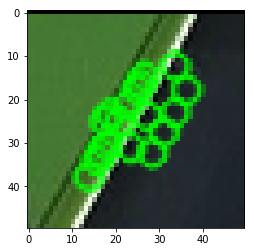

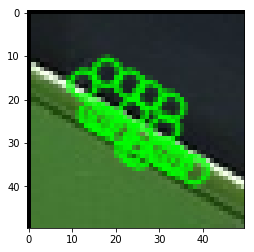

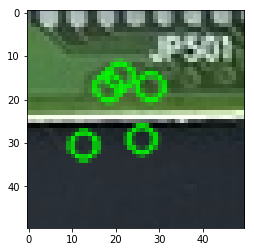

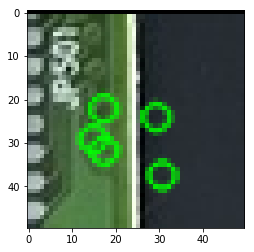

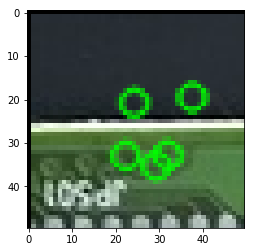

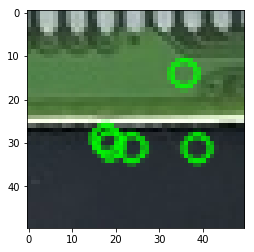

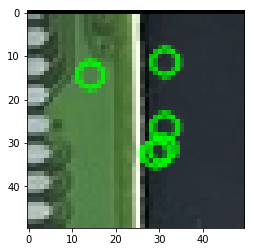

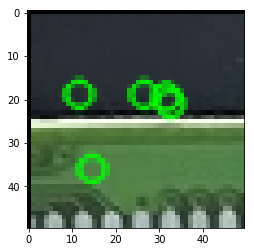

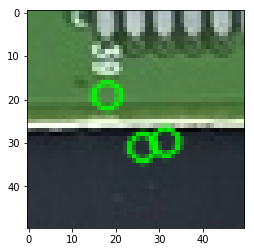

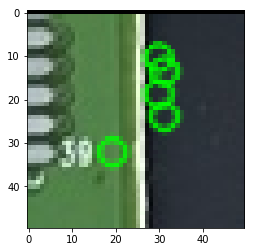

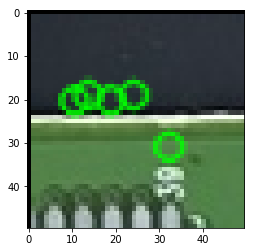

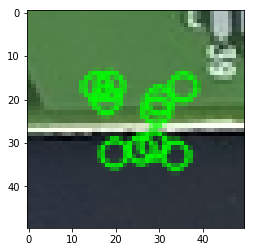

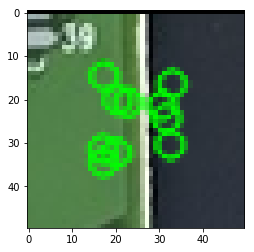

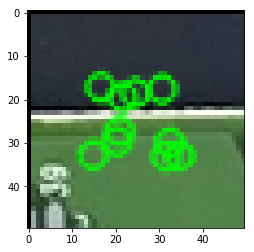

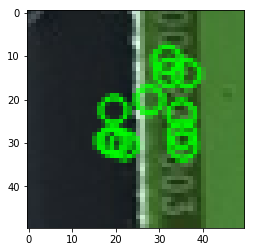

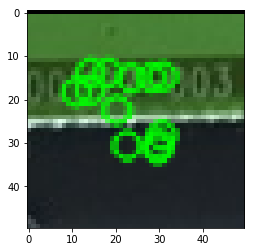

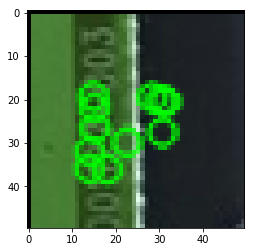

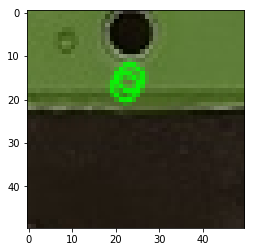

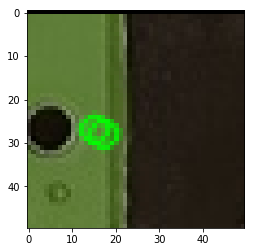

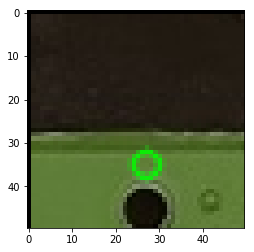

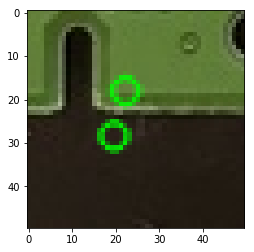

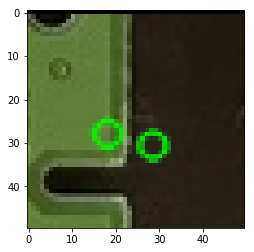

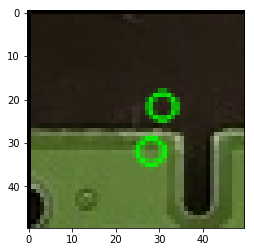

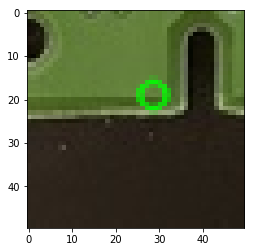

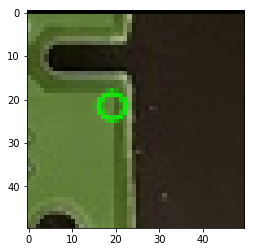

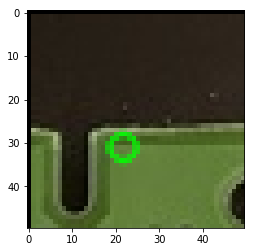

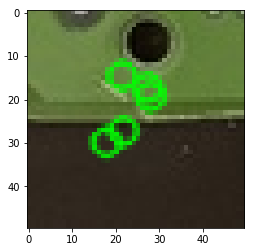

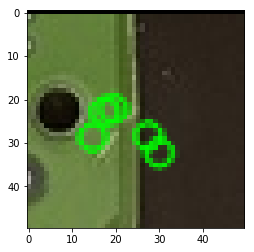

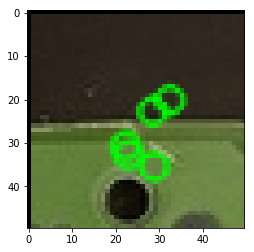

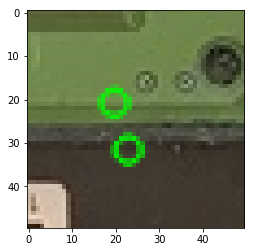

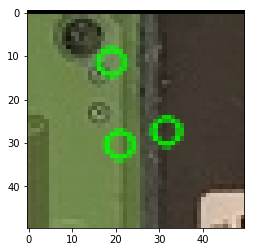

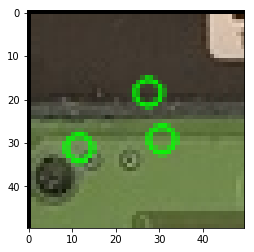

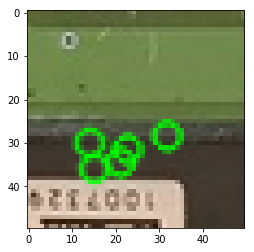

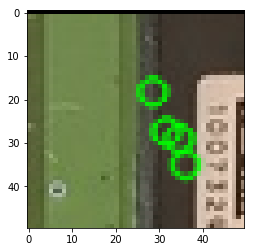

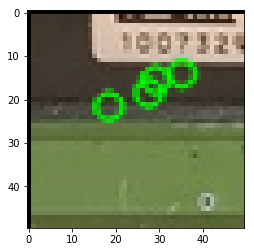

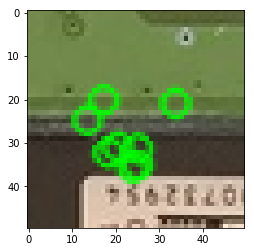

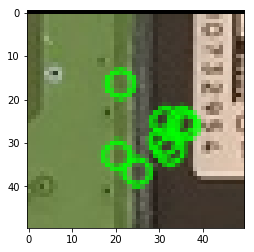

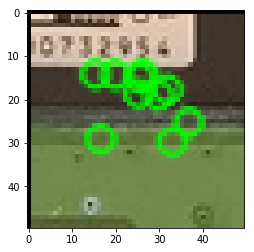

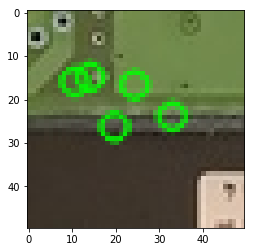

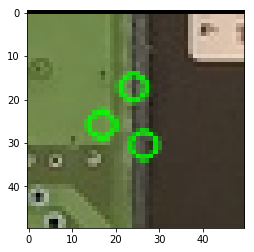

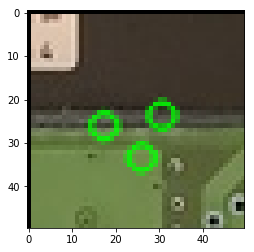

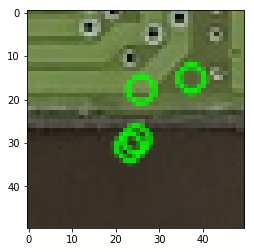

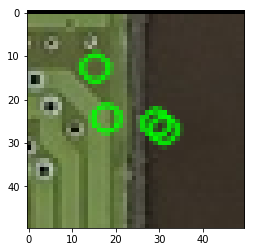

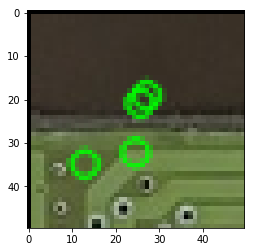

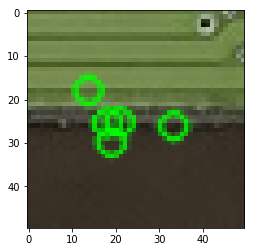

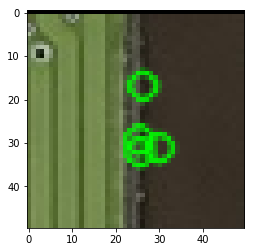

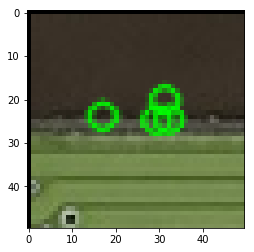

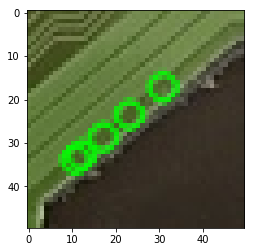

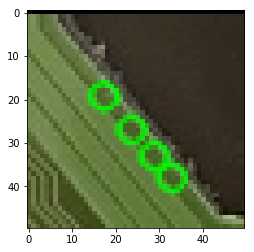

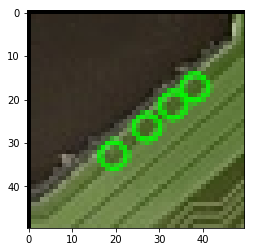

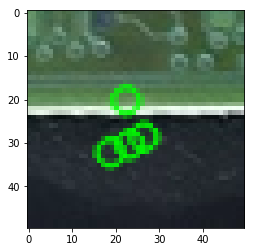

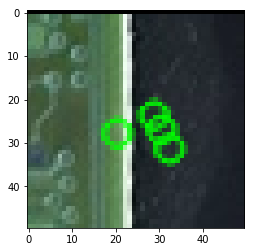

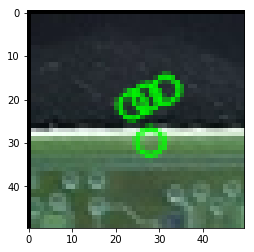

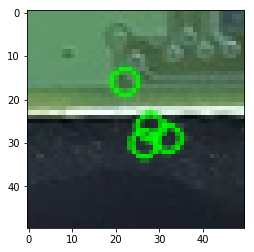

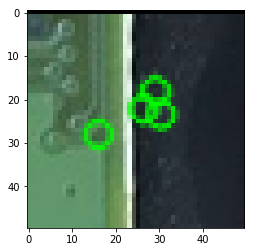

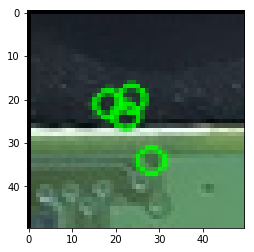

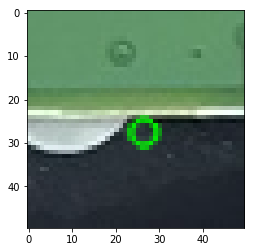

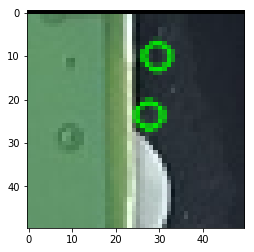

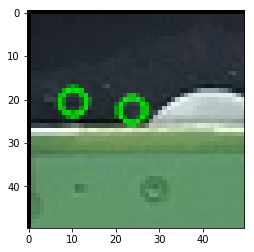

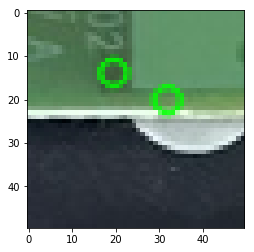

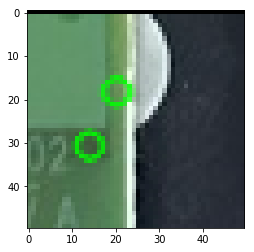

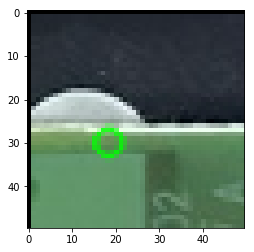

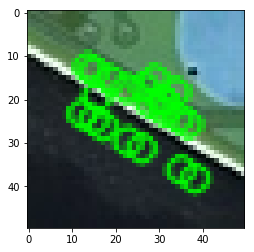

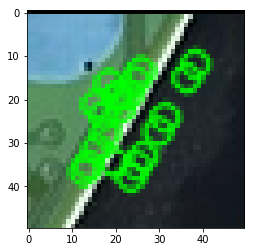

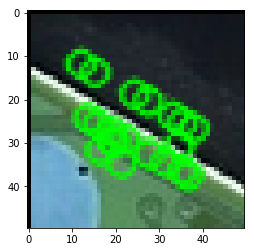

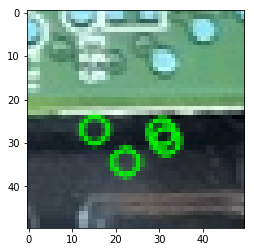

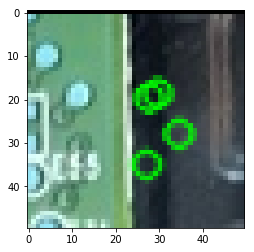

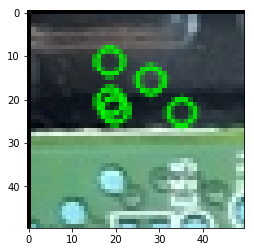

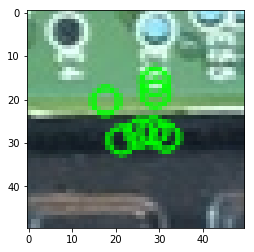

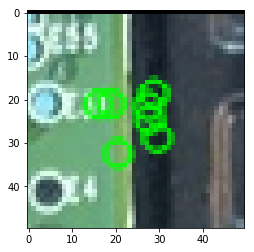

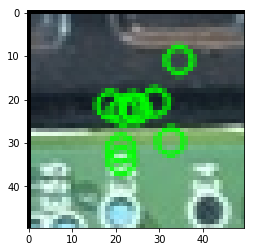

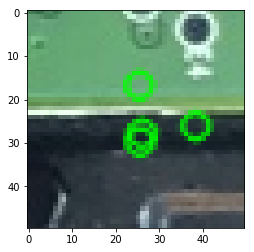

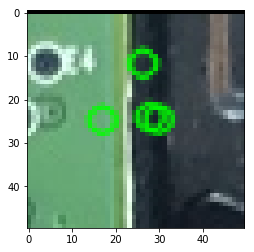

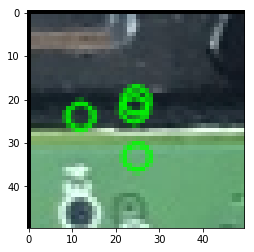

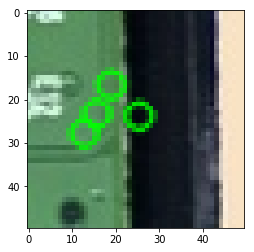

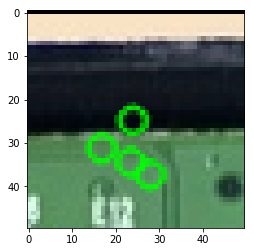

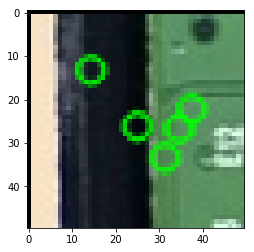

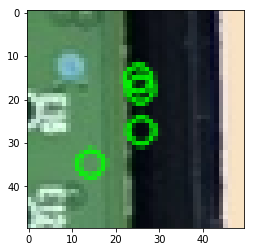

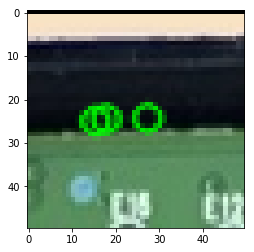

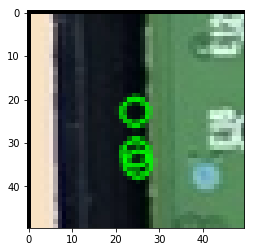

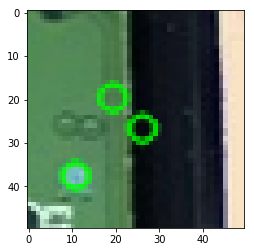

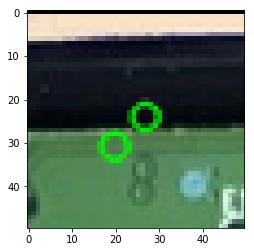

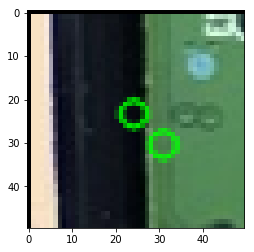

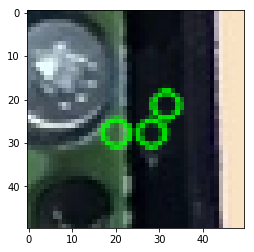

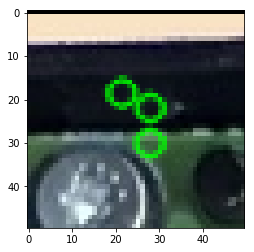

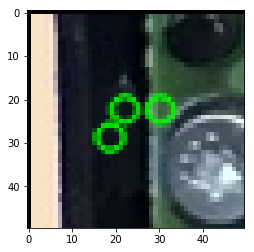

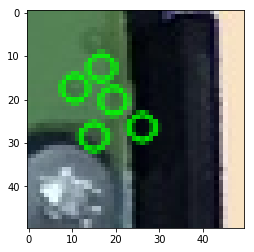

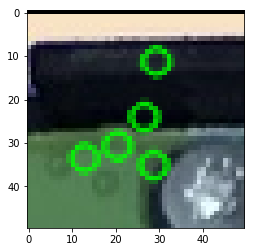

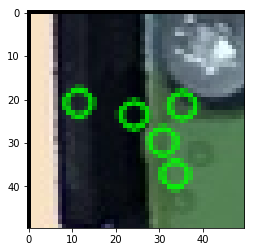

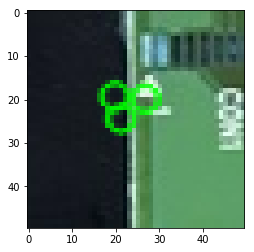

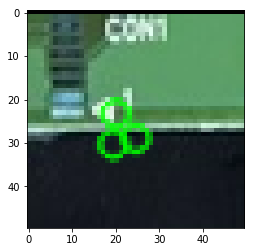

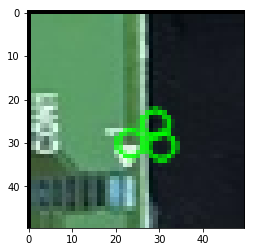

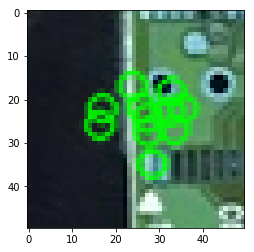

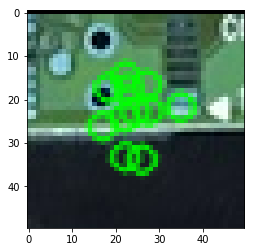

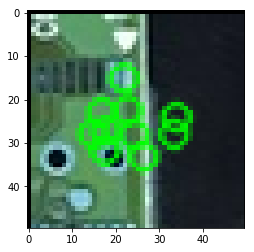

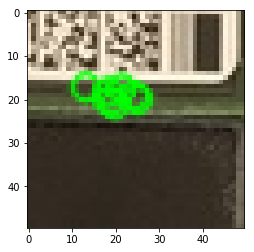

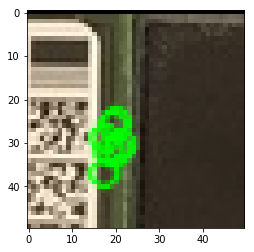

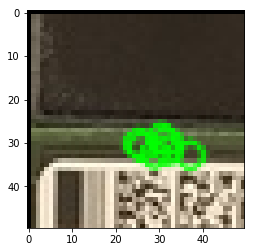

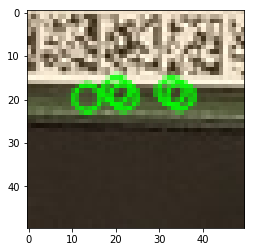

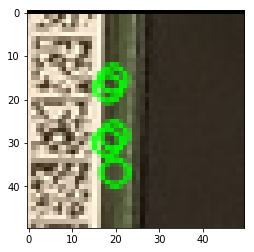

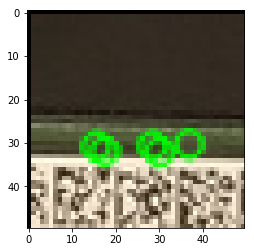

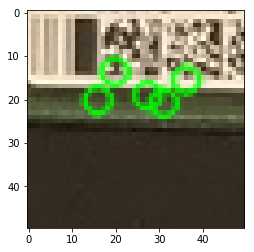

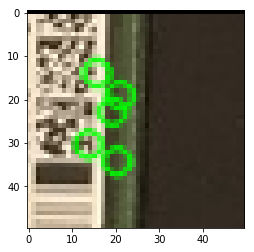

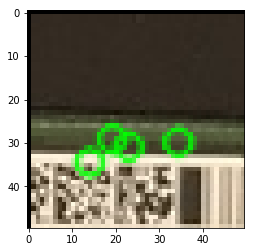

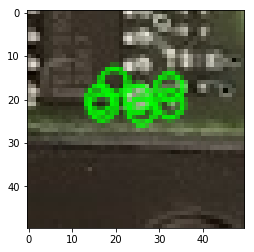

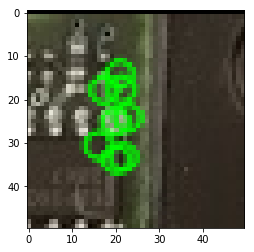

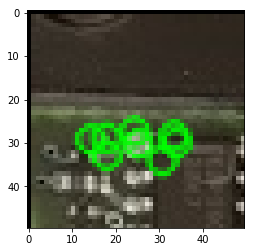

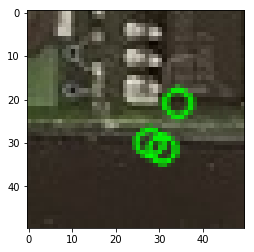

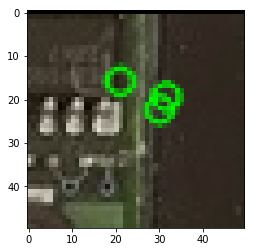

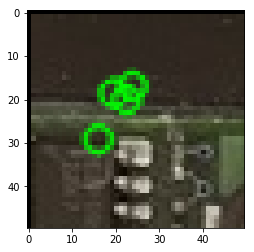

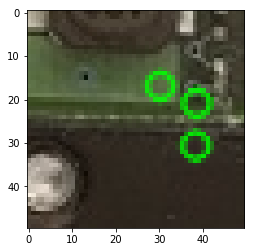

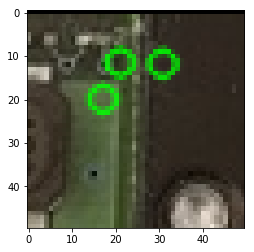

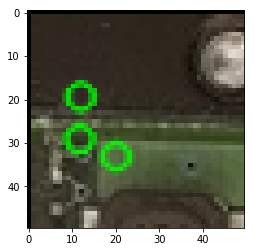

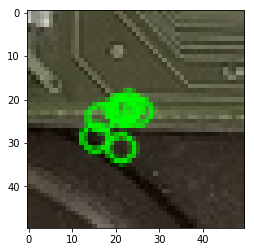

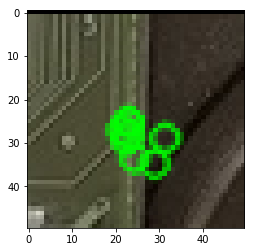

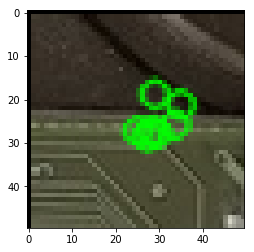

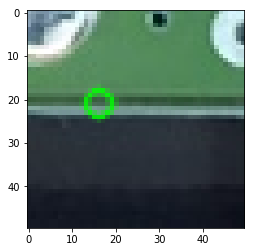

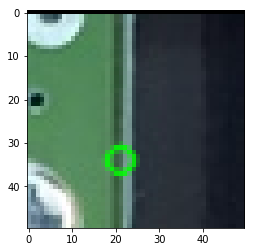

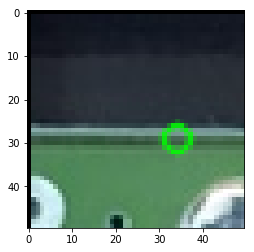

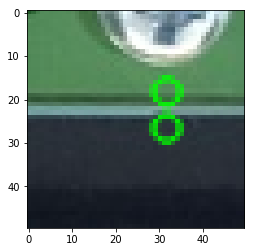

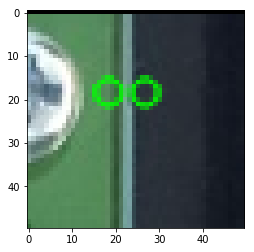

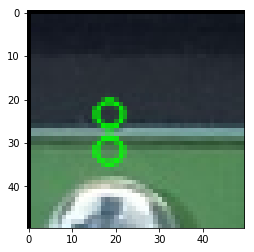

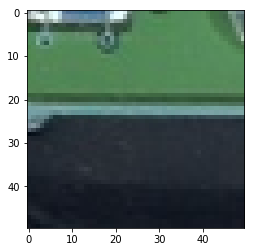

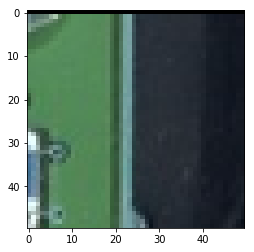

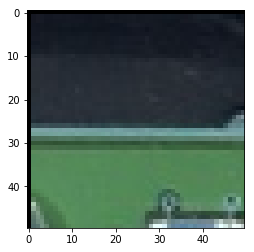

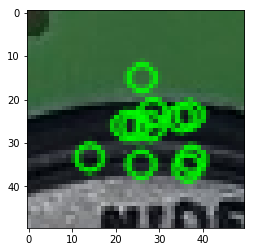

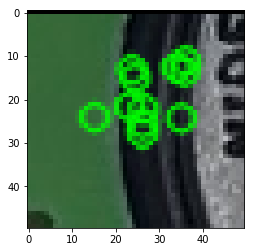

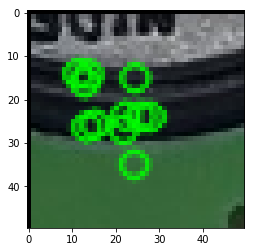

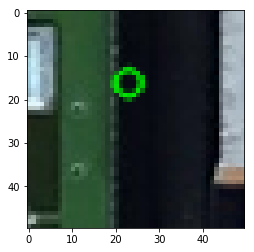

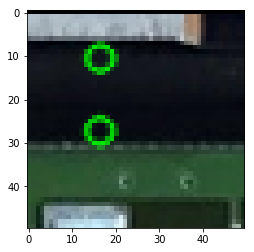

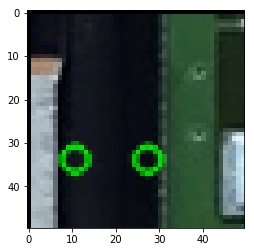

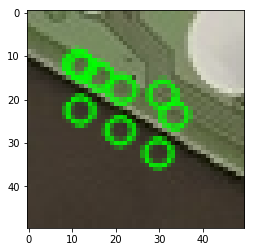

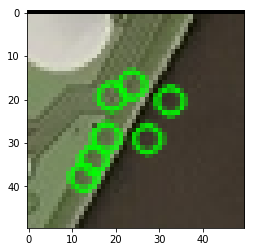

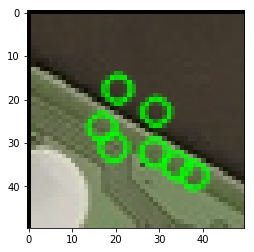

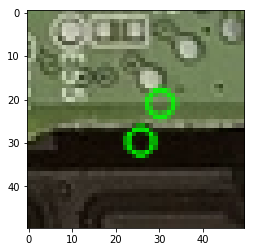

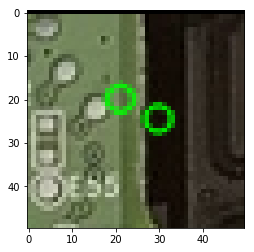

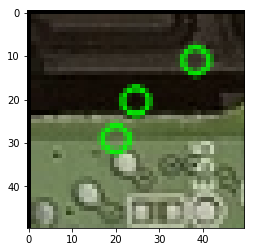

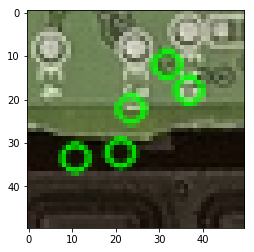

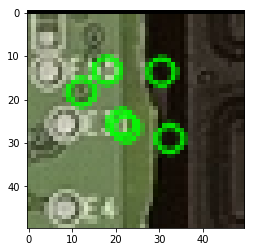

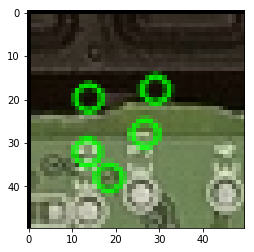

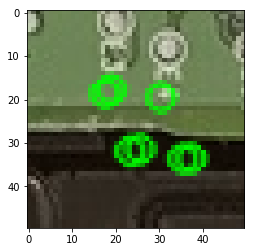

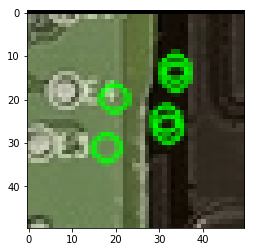

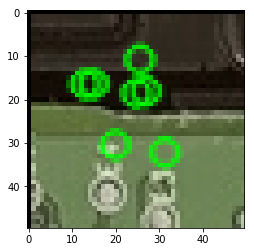

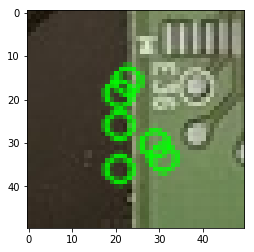

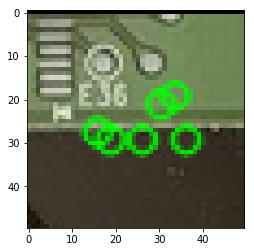

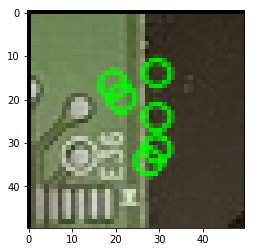

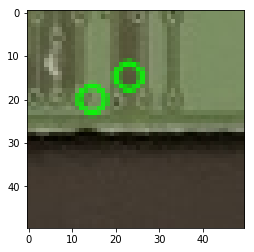

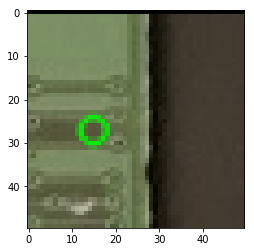

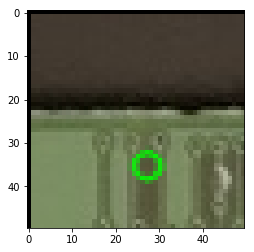

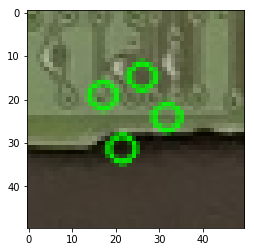

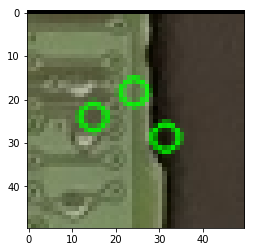

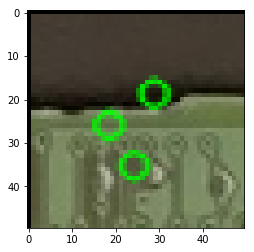

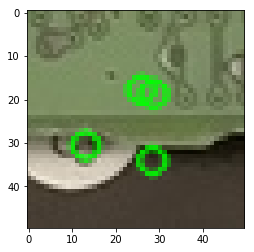

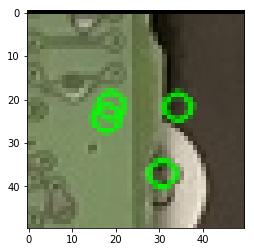

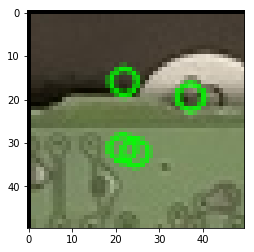

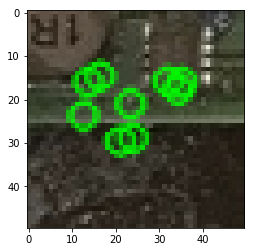

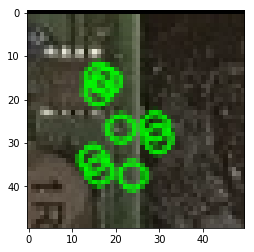

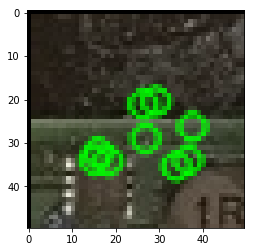

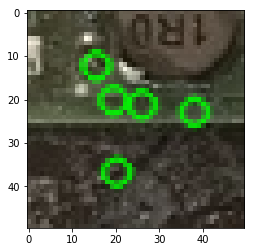

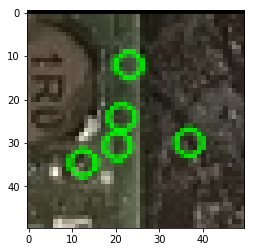

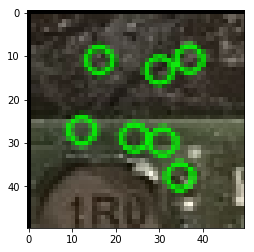

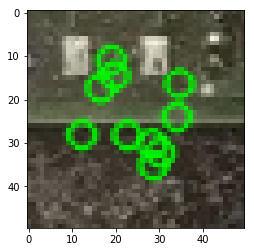

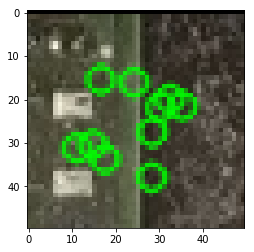

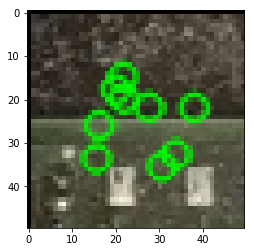

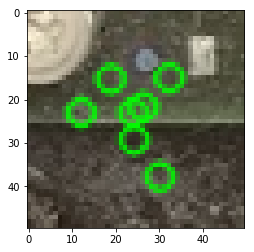

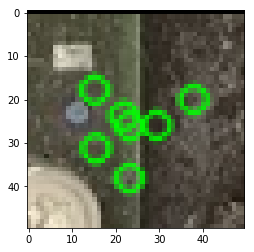

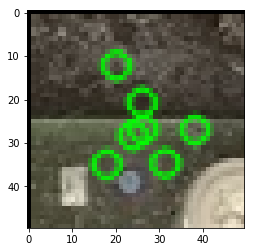

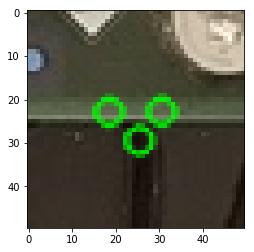

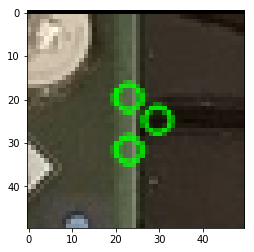

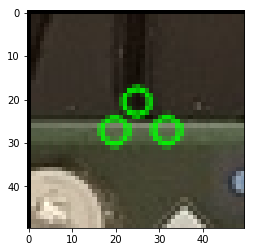

In [29]:
all_desc = np.array([[]])
bow = cv2.BOWKMeansTrainer(100)
print(bow)

for file in os.listdir("./"):
    if file.endswith(".txt"):
        #print(file)
        with open(file) as data_file:    
            data = json.load(data_file)
        #pprint(data[0][1])
        for imageData in data:
            #print (imageData[0])
            lever_img = cv2.imread('regression/' + imageData[0])
            #lever_img = cv2.resize(lever_img,None,fx=0.2, fy=0.2, interpolation = cv2.INTER_AREA)
            for i in range(0,3): 
                #print(lever_img.shape)
                rows,cols,wh = lever_img.shape
                
                if i !=0 :
                    M = cv2.getRotationMatrix2D((cols/2,rows/2),90*i,1)
                    #print(M)
                    rotated_img = cv2.warpAffine(lever_img,M,(cols,rows))
                    #plt.imshow(rotated_img);plt.show()
                else :
                    rotated_img = lever_img
                
                kp, des = surf.detectAndCompute(rotated_img, None)
                
                if des is None:
                    plt.imshow(rotated_img);plt.show()
                    continue
                
                
                bow.add(des)
                all_desc = np.append(all_desc,des)
                #print(all_desc.shape)
                outImg = 0;

                # draw only keypoints location,not size and orientation
                img2 = cv2.drawKeypoints(rotated_img,kp,color=(0,255,0),outImage=outImg, flags=0)
                plt.imshow(img2),plt.show()


In [30]:
dictionary = bow.cluster()

bow_extractor = cv2.BOWImgDescriptorExtractor(cv2.xfeatures2d.SURF_create(), cv2.BFMatcher(cv2.NORM_L2))
bow_extractor.setVocabulary(dictionary)
print(np.shape(dictionary))

(100, 64)


In [7]:
train_desc = []
train_label = []
train_label_y = []

for file in os.listdir("./"):
    if file.endswith(".txt"):
        #print(file)

        with open(file) as data_file:    
            data = json.load(data_file)

        for imageData in data:
            lever_img = cv2.imread('regression/' + imageData[0])
            rotmat = np.array([ [0,-1],[1,0] ])
            for i in range(0,3):
                if i != 0:
                    #print(lever_img.shape)
                    rows,cols,wh = lever_img.shape
                
                    M = cv2.getRotationMatrix2D((cols/2,rows/2),90*i,1)
                    #print(M)
                    rotated_img = cv2.warpAffine(lever_img,M,(cols,rows))
                    
                    bowdes = bow_extractor.compute(rotated_img,surf.detect(rotated_img))
                
                    if bowdes is None:
                        continue
                    
                    normx = -1.0*imageData[1]['x']
                    normy = -1.0*imageData[1]['y']
                    
                    res = np.array([normx,normy]).dot(rotmat)
                    print(res)
                    rotmat = rotmat.dot(rotmat)
                    train_label.append(res[0])
                    train_label_y.append(res[1])
                    
                    
                else :
                    rotated_img = lever_img
                    bowdes = bow_extractor.compute(rotated_img,surf.detect(rotated_img))
                
                    if bowdes is None:
                        continue                    

                    train_label.append(-1.0*imageData[1]['x'])
                    train_label_y.append(-1.0*imageData[1]['y'])
                
                
                train_desc.extend(bowdes)
                #print(imageData[1]['x'])
                

#print(train_label)
#print(np.shape(train_desc))

[-0.96689441 -0.2551768 ]
[-0.2551768   0.96689441]
[-0.96689441 -0.2551768 ]
[-0.2551768   0.96689441]
[-0.96689441 -0.2551768 ]
[-0.2551768   0.96689441]
[-0.96689441 -0.2551768 ]
[-0.2551768   0.96689441]
[-0.997974    0.06362311]
[ 0.06362311  0.997974  ]
[-0.9979828   0.06348491]
[ 0.06348491  0.9979828 ]
[-0.99211169  0.12535707]
[ 0.12535707  0.99211169]
[-0.99211169  0.12535707]
[ 0.12535707  0.99211169]
[-0.99211169  0.12535707]
[ 0.12535707  0.99211169]
[-0.99886814 -0.04756515]
[-0.04756515  0.99886814]
[-0.99886814 -0.04756515]
[-0.04756515  0.99886814]
[-0.99886814 -0.04756515]
[-0.04756515  0.99886814]
[-0.99886814 -0.04756515]
[-0.04756515  0.99886814]
[-0.92890892 -0.37030828]
[-0.37030828  0.92890892]
[-0.9997429  -0.02267458]
[-0.02267458  0.9997429 ]
[-0.9997429  -0.02267458]
[-0.02267458  0.9997429 ]
[-0.9997429  -0.02267458]
[-0.02267458  0.9997429 ]
[-0.9997429  -0.02267458]
[-0.02267458  0.9997429 ]
[-0.93958058  0.34232781]
[ 0.34232781  0.93958058]
[-0.93958058

In [23]:
test_desc = []
test_label = []
test_label_y = []
for file in os.listdir("./"):
    if file.endswith(".test"):
        print(file)
        with open(file) as test_data_file:
            test_data = json.load(test_data_file)
        for testImgData in test_data:
            
            test_img = cv2.imread('regression/' + testImgData[0])
            rotmat = np.array([ [0,-1],[1,0] ])
            for i in range(0,3):
                if i != 0:
                    #print(lever_img.shape)
                    rows,cols,wh = test_img.shape
                
                    M = cv2.getRotationMatrix2D((cols/2,rows/2),90*i,1)
                    #print(M)
                    rotated_img = cv2.warpAffine(test_img,M,(cols,rows))
                    normx = -1.0*testImgData[1]['x']
                    normy = -1.0*testImgData[1]['y']
                    print (rotmat)
                    res = np.array([normx,normy]).dot(rotmat)
                    print(res)
                    rotmat = rotmat.dot(rotmat)
                    
                    test_label.append(res[0])
                    test_label_y.append(res[1])
                else :
                    rotated_img = test_img
                    test_label.append(-1.0*testImgData[1]['x'])
                    test_label_y.append(-1.0*testImgData[1]['y'])
                
                bowdes = bow_extractor.compute(rotated_img,surf.detect(rotated_img))
                test_desc.extend(bowdes)
#test_label

IMG_5975.jpg-data.txt.test
[[ 0 -1]
 [ 1  0]]
[-0.99994281  0.01069458]
[[-1  0]
 [ 0 -1]]
[ 0.01069458  0.99994281]
[[ 0 -1]
 [ 1  0]]
[-0.99994281  0.01069458]
[[-1  0]
 [ 0 -1]]
[ 0.01069458  0.99994281]
[[ 0 -1]
 [ 1  0]]
[-0.99994281  0.01069458]
[[-1  0]
 [ 0 -1]]
[ 0.01069458  0.99994281]
[[ 0 -1]
 [ 1  0]]
[-0.99990266 -0.01395213]
[[-1  0]
 [ 0 -1]]
[-0.01395213  0.99990266]
[[ 0 -1]
 [ 1  0]]
[-0.99990266 -0.01395213]
[[-1  0]
 [ 0 -1]]
[-0.01395213  0.99990266]
[[ 0 -1]
 [ 1  0]]
[-0.99990266 -0.01395213]
[[-1  0]
 [ 0 -1]]
[-0.01395213  0.99990266]
[[ 0 -1]
 [ 1  0]]
[-0.99990266 -0.01395213]
[[-1  0]
 [ 0 -1]]
[-0.01395213  0.99990266]
[[ 0 -1]
 [ 1  0]]
[-0.06826146 -0.99766747]
[[-1  0]
 [ 0 -1]]
[-0.99766747  0.06826146]
[[ 0 -1]
 [ 1  0]]
[-0.13270699  0.99115531]
[[-1  0]
 [ 0 -1]]
[ 0.99115531  0.13270699]
[[ 0 -1]
 [ 1  0]]
[-0.13270699  0.99115531]
[[-1  0]
 [ 0 -1]]
[ 0.99115531  0.13270699]
[[ 0 -1]
 [ 1  0]]
[-0.13270699  0.99115531]
[[-1  0]
 [ 0 -1]]
[ 0.99115

In [9]:
k=['rbf', 'linear','poly','sigmoid']
c= range(1,100)
g=np.arange(1e-4,1e-2,0.0001)
g=g.tolist()
param_grid=dict(kernel=k, C=c, gamma=g)
#print (param_grid)

In [10]:
print("Hello")
#svr=SVR()
#grid = GridSearchCV(svr, param_grid, cv=5,scoring='neg_mean_squared_error')
#grid.fit(train_desc, train_label)

Hello


In [96]:
print()
print("Grid scores on development set:")
print()  
#print (grid.grid_scores_)  
print("Best parameters set found on development set:")
print()
print(grid.best_params_)
print("Grid best score:")
print()
#print (grid.best_score_)
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
#print (grid_mean_scores)


Grid scores on development set:

Best parameters set found on development set:



NameError: name 'grid' is not defined

In [11]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.001)


#svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)
x_rbf = svr_rbf.fit(train_desc, train_label).predict(test_desc)
y_rbf = svr_rbf.fit(train_desc,train_label_y).predict(test_desc)
#y_lin = svr_lin.fit(train_desc, train_label).predict(test_desc)
#y_poly = svr_poly.fit(train_desc, train_label).predict(test_desc)

In [40]:
#print(x_rbf)
#print(test_label)
#print(test_label_y)
#print(y_lin)
#print(y_poly)

xmse = mean_squared_error(y_pred=x_rbf, y_true=test_label)

ymse = mean_squared_error(y_pred=y_rbf, y_true=test_label_y)

print (xmse )
print(ymse)

x_errors = x_rbf - test_label
y_errors = y_rbf - test_label_y

0.419951528958
0.52440766461


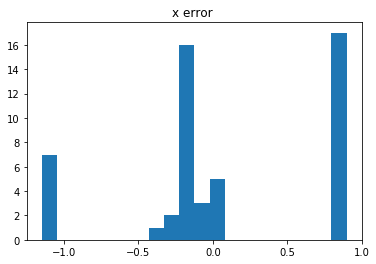

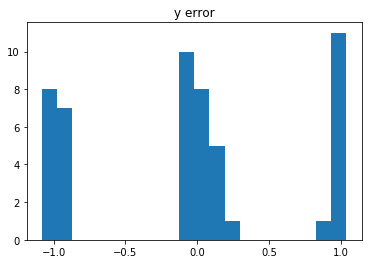

In [41]:
plt.hist(x_errors, bins=20)  # arguments are passed to np.histogram
plt.title("x error ")
plt.show()

plt.hist(y_errors, bins=20)  # arguments are passed to np.histogram
plt.title("y error")
plt.show()